In [1]:
%run '00_rh_settings.ipynb'

Populating the interactive namespace from numpy and matplotlib


# Проверка на нормальность с помощью байесовых методов

Можно было бы провести простой тест на нормальность, но мы не ищем легких путей

### Проверяем акции Apple

In [2]:
ts_series=data.query("Stock == 'AAPL'")["Return"].dropna()

In [3]:
import pymc3 as pm

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Нормальное распределение

In [4]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", -100, 100)
    sigma = pm.HalfNormal("sigma")
    y = pm.Normal("y", mu=mu, sd=sigma, observed=ts_series)
    
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, mu_interval__]
100%|██████████| 1600/1600 [00:04<00:00, 388.18it/s]
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.99553350980759, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance prob

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11426d048>,
      dtype=object)

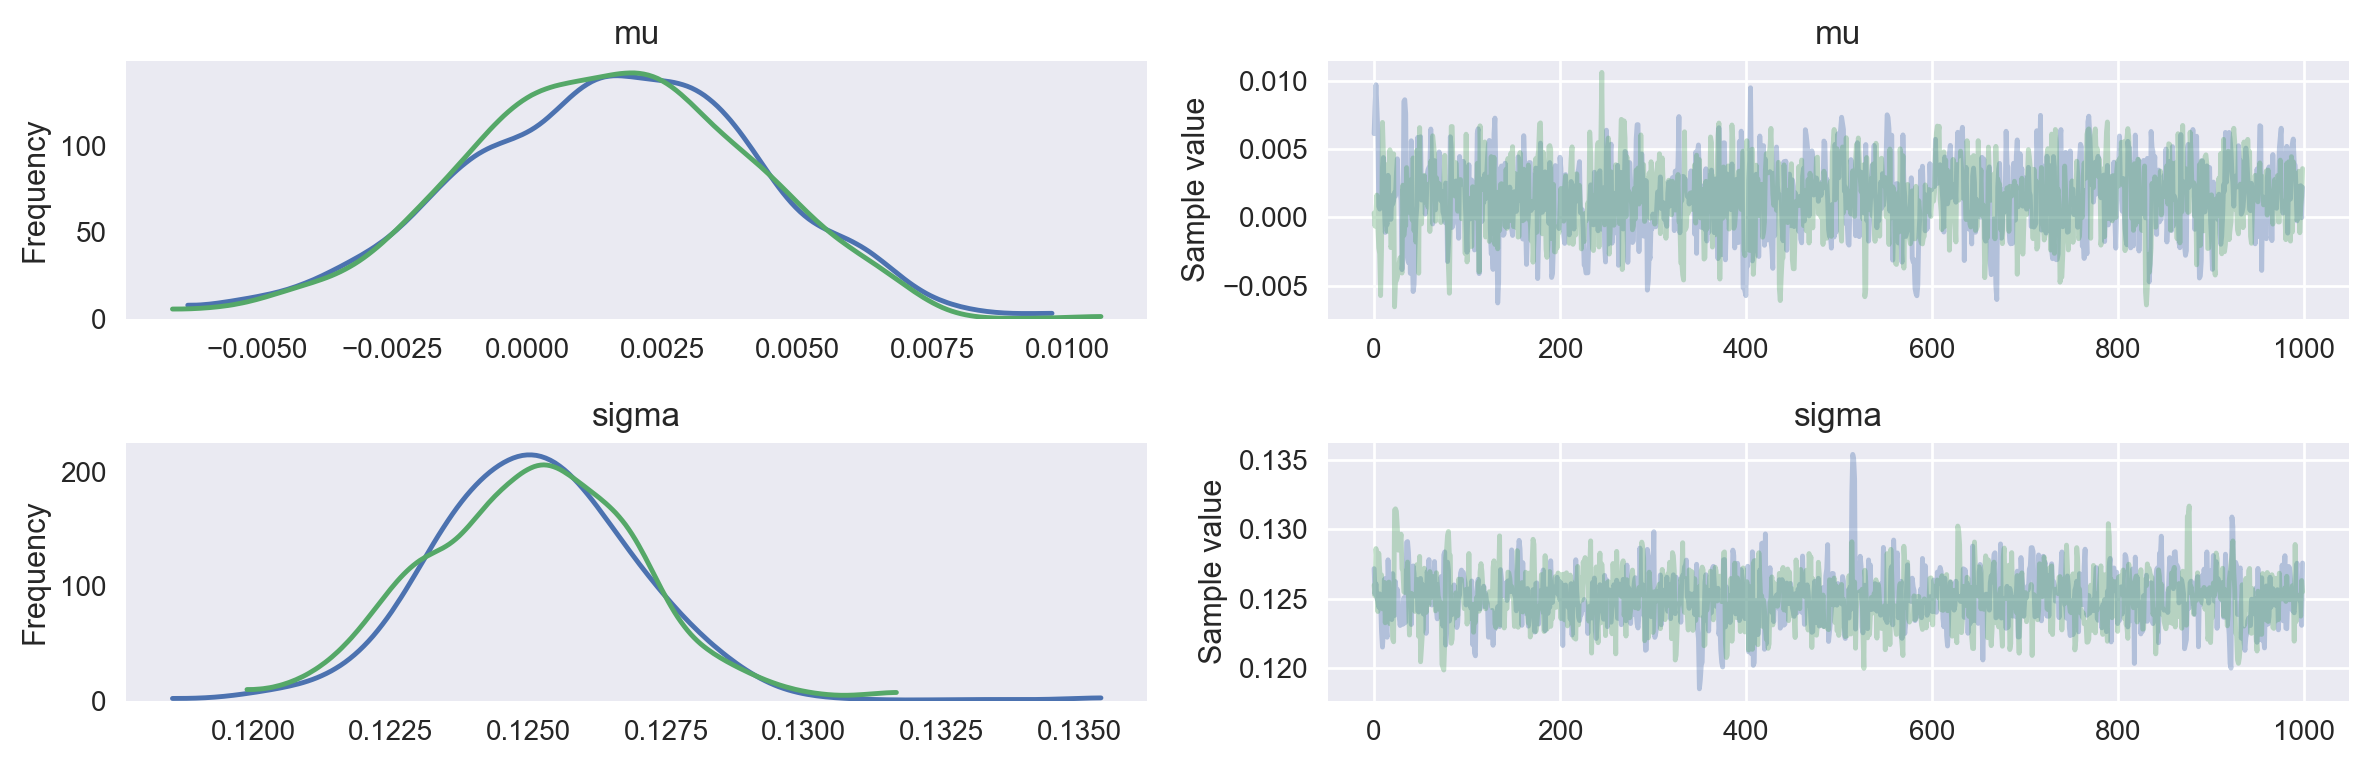

In [5]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)

In [6]:
pm.stats.summary(trace_g)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,0.001448,0.002644,0.000082,-0.003355,0.006788,966.679016,0.999935
sigma,0.125037,0.001864,0.000058,0.121293,0.128422,1077.066728,0.999958


Видим достаточно большой разброс как в значении среднего, так и по стандартному отклонению. Значит, что в разные моменты времени мого быть разное среднее и разное ст. отклонение.

## Распределение стьюдента

In [7]:
with pm.Model() as model_t:
    mu = pm.Uniform("mu", -100, 100)
    sigma = pm.HalfNormal("sigma")
    nu = pm.Exponential('nu', 0.1)
    #nu = pm.Exponential('nu', lam=pm.math.exp(-2*sigma))
    y = pm.StudentT("y", mu=mu, sd=sigma, nu=nu, observed=ts_series)
    
    trace_t = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_log__, sigma_log__, mu_interval__]
 83%|████████▎ | 1322/1600 [00:09<00:02, 132.62it/s]/usr/local/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 1600/1600 [00:12<00:00, 130.44it/s]
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115fb7978>,
      dtype=object)

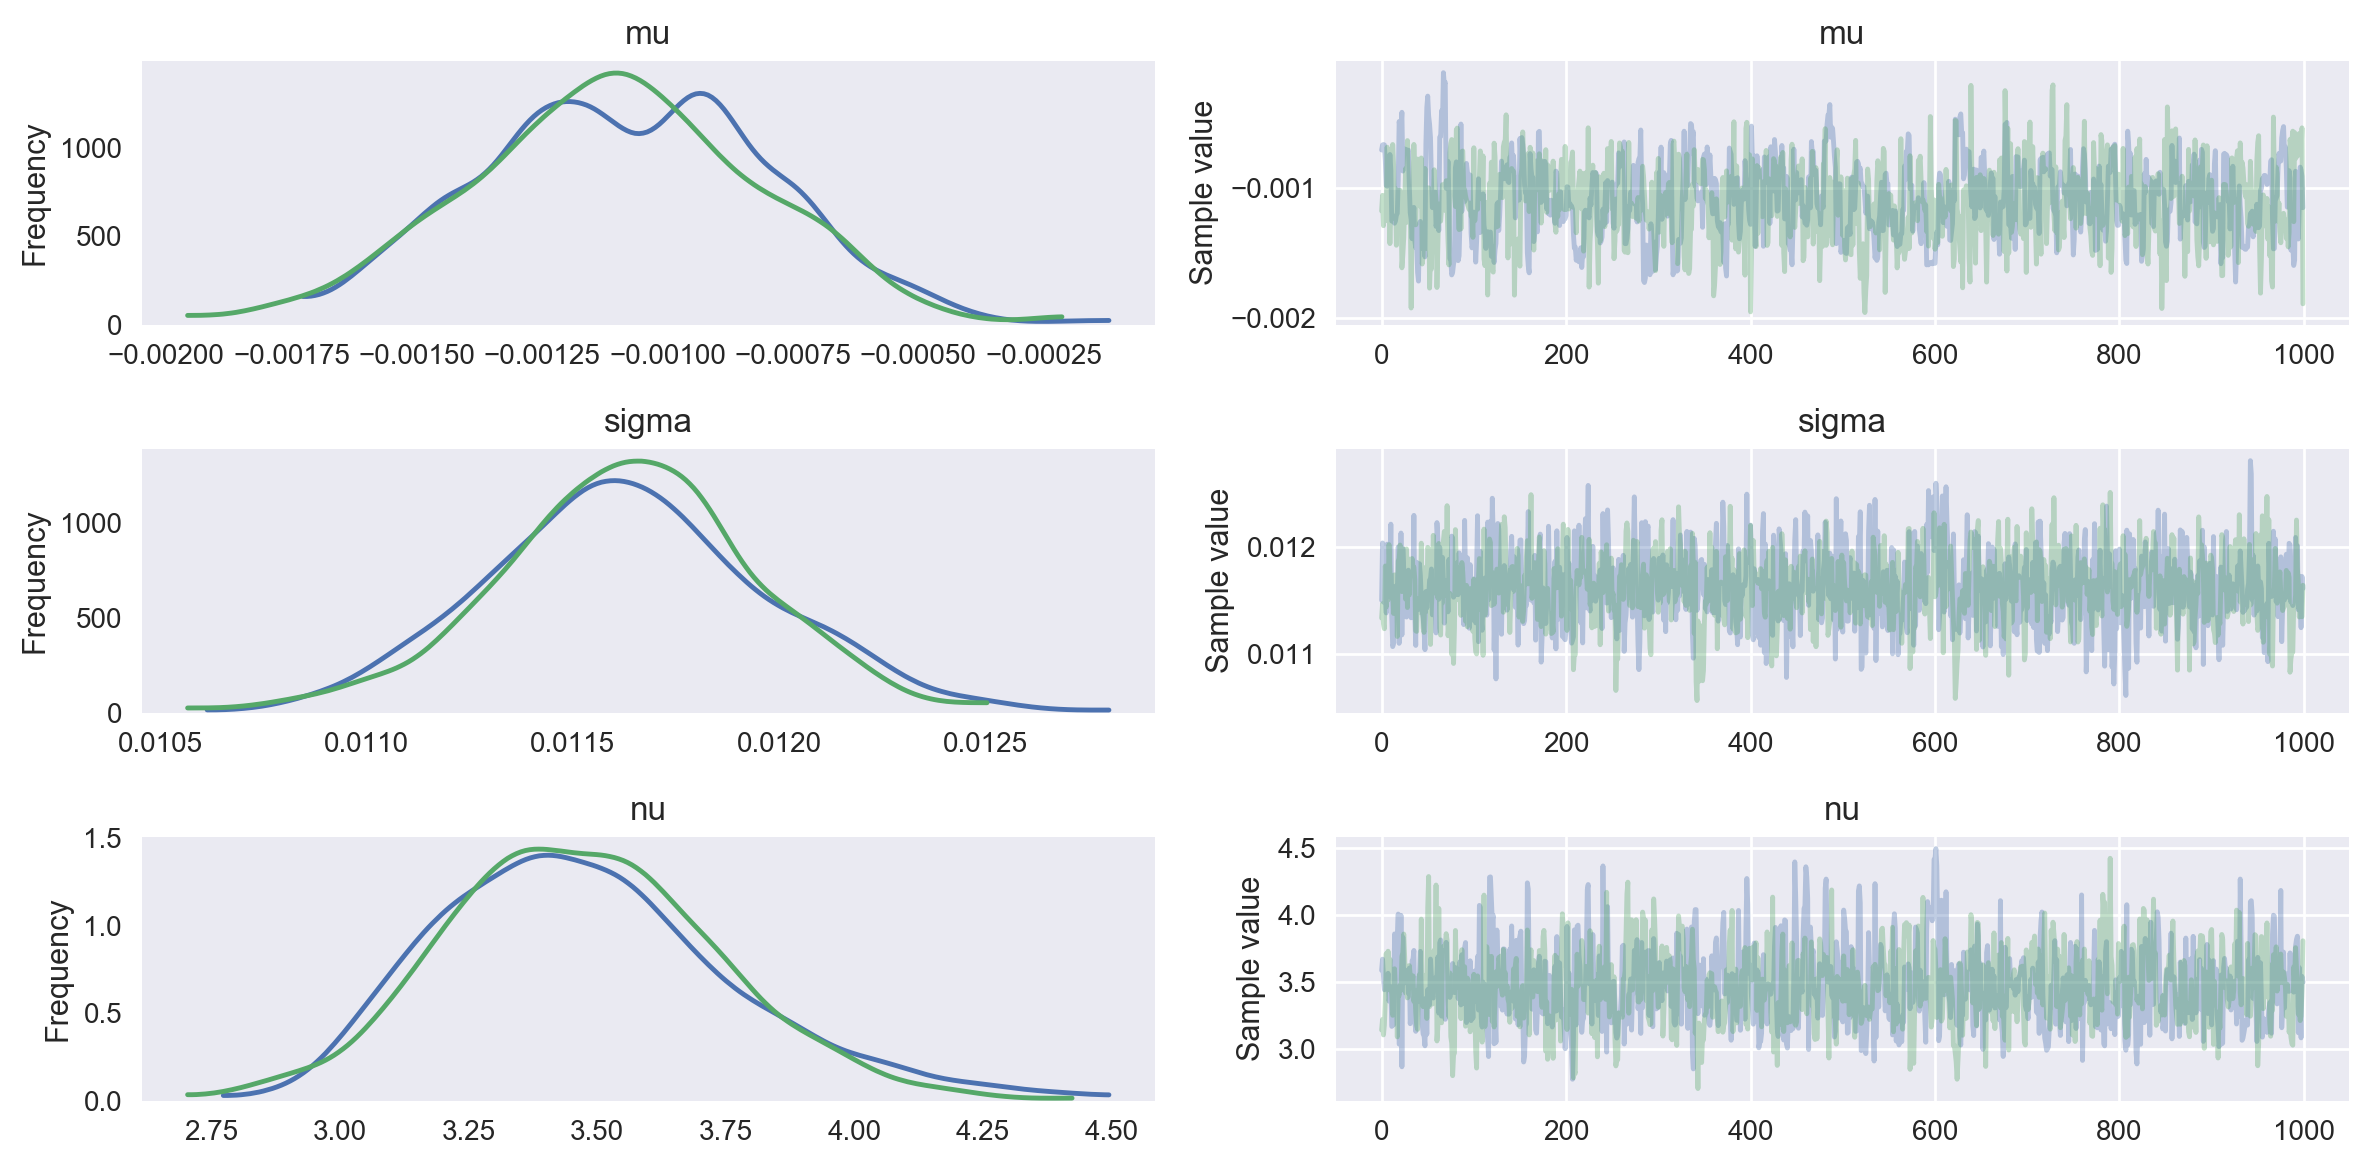

In [8]:
chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [9]:
pm.stats.summary(trace_t)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-0.001099,0.000289,0.000010,-0.001645,-0.000542,633.246632,1.001519
sigma,0.011627,0.000324,0.000009,0.010993,0.012251,1173.382583,0.999560
nu,3.470665,0.278391,0.008778,2.968678,4.040069,1010.735160,0.999583


Разброс в среднем и стандратном отклонениеи стал меньше.
Поскольку степенная функция $\nu$ имеет значение близкое к 4, мы не можем считать распределение нормальным